2
[-1.23581922 -3.34015405]
[0.37577183 0.64907283] [-0.37577183 -0.64907283]
[[ 0.75031162 -0.13193338]
 [-0.13193338  0.44968838]]


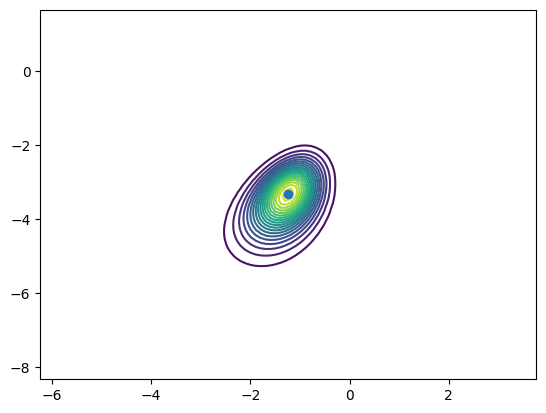

In [274]:
from src_bis.target import Target
from src_bis.optim import VI_IGMM

import numpy as np 
from matplotlib  import pyplot as plt 
from einops import rearrange
import math 
from scipy.optimize import minimize


d = 2

target = Target("logreg", d, n_samples = 100,  meanShift=1.5 )

def objective(theta):
        return -target.model.unormalized_logpdf(theta[None])


theta0 = np.zeros( target.model.X.shape[1])
mode = minimize(objective, theta0 ).x
print(mode)

print(target.model.mean0,target.model.mean1 )
print(target.model.cov)

grid_size = 100
radius =  5
center = mode
x = np.linspace(center[0] - radius, center[0]+radius,  grid_size)
y = np.linspace(center[1] - radius, center[1]+radius, grid_size)
dx = x[1] - x[0]
dy = y[1] - y[0]

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
pos = rearrange(pos, "h w d -> (h w) d")
Z = target.model.unormalized_logpdf(pos)
Z = np.exp(rearrange(Z, "(h w) -> h w", h = grid_size))
fig, ax = plt.subplots()
ax.contour(X, Y, Z/Z.sum(), levels=20, cmap="viridis", zorder=1,   \
           extent=(X[0,0],X[0,-1],Y[0,0],Y[-1,0]))
ax.scatter(mode[0], mode[1])
z = 2*np.linalg.inv(target.model.cov)@target.model.mean1
# ax.scatter(target.model.mean0[0], target.model.mean0[1])
#  x = np.linspace(-bound, bound, grid_size)
#                 y = np.linspace(-bound, bound, grid_size)
#                 X, Y = np.meshgrid(x, y)
#                 pos = np.dstack((X, Y))[:, :, None, :]
#                 Z = self.model.prob(pos)
#                 ax.contour(X, Y, Z, levels=10, cmap="viridis")
#                 self.contours = (X,Y,Z)

100


  0%|          | 0/20000 [00:00<?, ?it/s]/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:82: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:87: RuntimeWarning: overflow encountered in exp
  logpdf = (self.y[:,None] * logits - np.log(1 + np.exp(logits))).sum(axis =  0)
  0%|          | 1/20000 [00:00<1:32:37,  3.60it/s]

LR 0.01
KL  inf


  5%|▌         | 1002/20000 [03:42<1:04:04,  4.94it/s]

LR 0.01
KL  inf


 10%|█         | 2001/20000 [07:06<59:39,  5.03it/s]  

LR 0.01
KL  12557.48234927395


 15%|█▌        | 3001/20000 [10:34<1:00:42,  4.67it/s]

LR 0.01
KL  5792.278858868519


 20%|██        | 4002/20000 [14:08<52:34,  5.07it/s]  

LR 0.01
KL  2121.2750587446744


 25%|██▌       | 5002/20000 [17:24<48:03,  5.20it/s]

LR 0.01
KL  506.46164116236554


 30%|███       | 6002/20000 [20:38<45:31,  5.12it/s]

LR 0.01
KL  475.97082693161434


 35%|███▌      | 7002/20000 [23:54<41:36,  5.21it/s]

LR 0.01
KL  473.8699289656216


 40%|████      | 8002/20000 [27:18<39:27,  5.07it/s]  

LR 0.01
KL  475.3543764170419


 45%|████▌     | 9001/20000 [30:50<39:40,  4.62it/s]  

LR 0.01
KL  474.0699232476371


 50%|█████     | 10002/20000 [34:20<36:06,  4.61it/s]

LR 0.01
KL  480.552886683026


 55%|█████▌    | 11001/20000 [37:50<33:38,  4.46it/s]

LR 0.01
KL  473.4780108434487


 60%|██████    | 12001/20000 [41:21<27:50,  4.79it/s]

LR 0.01
KL  473.1707609588442


 65%|██████▌   | 13001/20000 [44:55<23:25,  4.98it/s]

LR 0.01
KL  473.0881401077745


 70%|███████   | 14002/20000 [48:18<19:36,  5.10it/s]

LR 0.01
KL  469.7141998001293


 75%|███████▌  | 15001/20000 [51:40<17:32,  4.75it/s]

LR 0.01
KL  473.0928748904184


 80%|████████  | 16001/20000 [55:02<14:07,  4.72it/s]

LR 0.01
KL  476.71698350260885


 85%|████████▌ | 17002/20000 [58:38<09:54,  5.04it/s]

LR 0.01
KL  474.9414785605386


 90%|█████████ | 18002/20000 [1:02:06<06:57,  4.79it/s]

LR 0.01
KL  475.99701126743037


 95%|█████████▌| 19001/20000 [1:05:22<03:31,  4.71it/s]

LR 0.01
KL  470.5148536401239


100%|██████████| 20000/20000 [1:08:33<00:00,  4.86it/s]


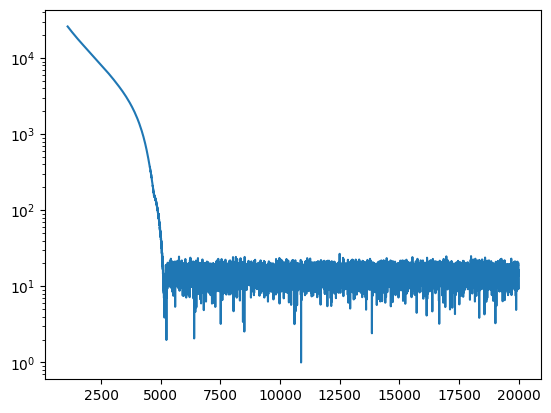

In [382]:

from src_bis.optim import VI_IGMM
from matplotlib import pyplot as plt 
from src_bis.target import Target
import numpy as np 

d = 100

target = Target("logreg", d = d, n_samples = 500,  meanShift=0.05)

vi = VI_IGMM(target, learning_rate = 0.01, n_iterations=20000, n_components = 5, scale = np.sqrt(d)*10 , BG = 100, s = np.sqrt(d) * 10, d = d)

vi.optimize(ibw = True, md  = False, means_only=False, plot_iter=1000, gen_noise=True,  scheduler=False, save_grads=False)


plt.semilogy(np.array(vi.kls) - np.array(vi.kls).min()+1)
# v.plot_circle(0, ax, bound=30)


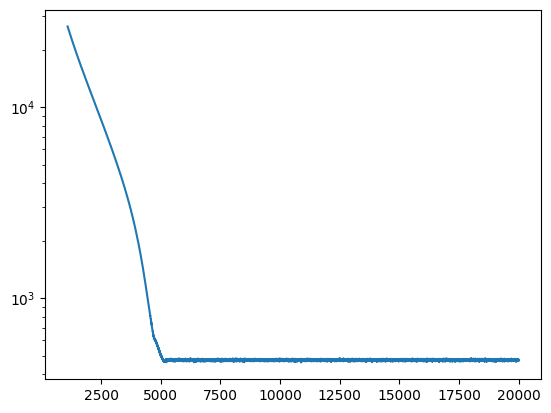

In [383]:
plt.semilogy(np.array(vi.kls))



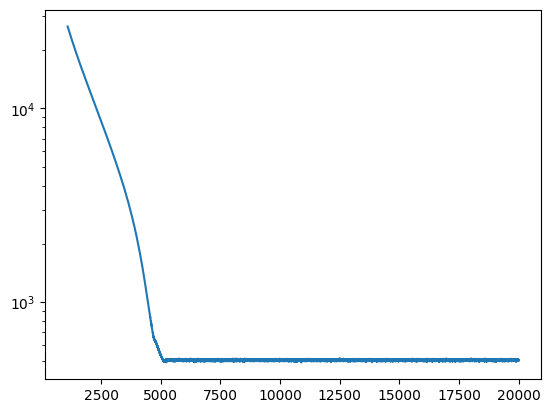

In [384]:
plt.semilogy(np.array(vi.kls) +30)


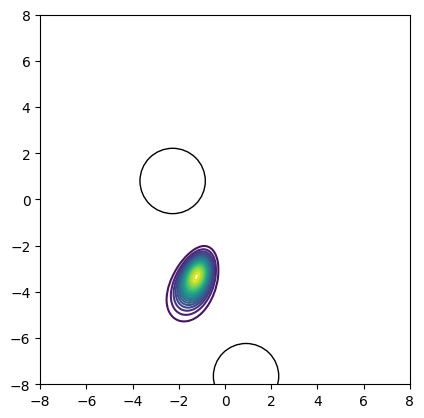

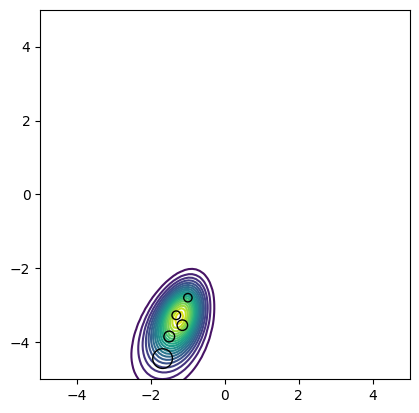

In [282]:

grid_size = 100
radius =  5
center = mode
x = np.linspace(center[0] - radius, center[0]+radius,  grid_size)
y = np.linspace(center[1] - radius, center[1]+radius, grid_size)


X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
pos = rearrange(pos, "h w d -> (h w) d")
Z = target.model.unormalized_logpdf(pos)
Z = np.exp(rearrange(Z, "(h w) -> h w", h = grid_size))

fig, ax = plt.subplots()
ax.contour(X, Y, Z/Z.sum(), levels=20, cmap="viridis", zorder=1,   \
           extent=(X[0,0],X[0,-1],Y[0,0],Y[-1,0]))
vi.vgmm.plot_circle(0, ax,bound = 8)

fig, ax = plt.subplots()
ax.contour(X, Y, Z/Z.sum(), levels=20, cmap="viridis", zorder=1,   \
           extent=(X[0,0],X[0,-1],Y[0,0],Y[-1,0]))
vi.vgmm.plot_circle(-1, ax,bound = 5)
# ax = target.plot()
# vi.vgmm.plot_circle(-1, ax,bound = 30)
# # v.plot_circle(0, ax, bound=30)


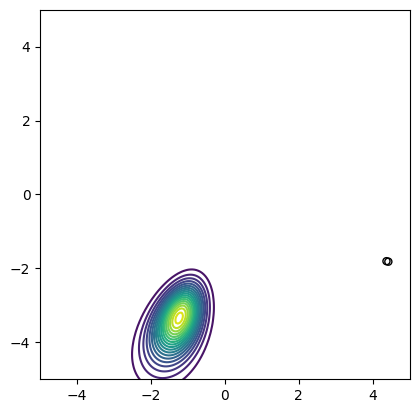

In [334]:

fig, ax = plt.subplots()
ax.contour(X, Y, Z/Z.sum(), levels=20, cmap="viridis", zorder=1,   \
           extent=(X[0,0],X[0,-1],Y[0,0],Y[-1,0]))
vi.vgmm.plot_circle(-1, ax,bound = 5)

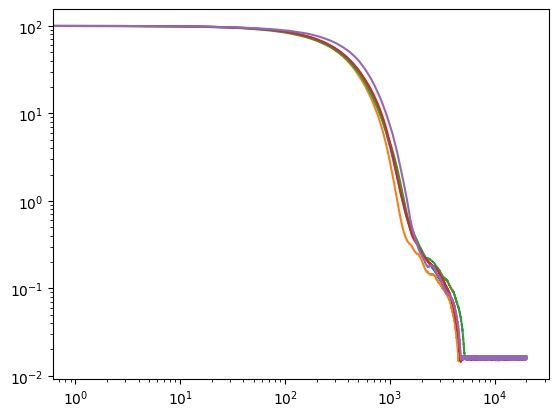

In [ ]:
plt.loglog(vi.vgmm.optimized_epsilons)


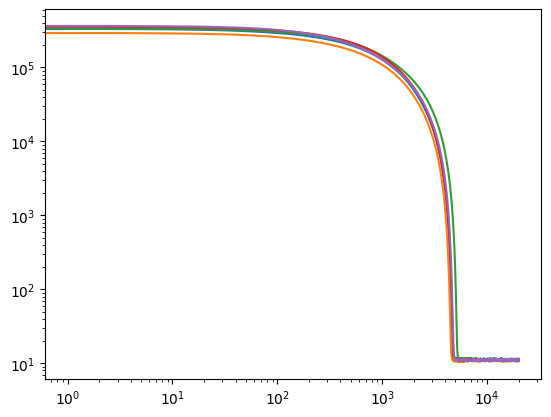

In [386]:
plt.loglog((vi.vgmm.get_means_evolution()**2).sum(axis = -1))


In [ ]:
def plot_approximation(bounds = (20, 20),  grid_size =100):

    x = np.linspace(-bounds[0], bounds[0],  grid_size)
    y = np.linspace(-bounds[1], bounds[1], grid_size)

    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    pos = rearrange(pos, "h w d -> (h w) d")
    Z = vi.vgmm.prob(pos[:,None])
    Z = np.exp(rearrange(Z, "(h w) -> h w", h = grid_size))
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=20, cmap="viridis", zorder=1,   \
            extent=(X[0,0],X[0,-1],Y[0,0],Y[-1,0]))


array([[-1.89560455, -1.50744956],
       [-1.06737392, -0.82745549],
       [-3.04164287, -2.45343455],
       [-2.12259107, -2.08516086],
       [-4.09842866, -3.68464794]])

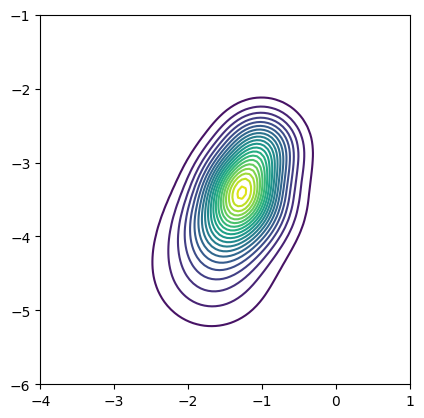

In [289]:
bounds =  (-5, 10)
x = np.linspace(-4, 1,  grid_size)
y = np.linspace(-6, -1, grid_size)

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
pos = rearrange(pos, "h w d -> (h w) d")
Z = vi.vgmm.prob(pos[:,None])
Z = np.exp(rearrange(Z, "(h w) -> h w", h = grid_size))
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=20, cmap="viridis", zorder=1,   \
        extent=(X[0,0],X[0,-1],Y[0,0],Y[-1,0]))
ax.set_aspect('equal')

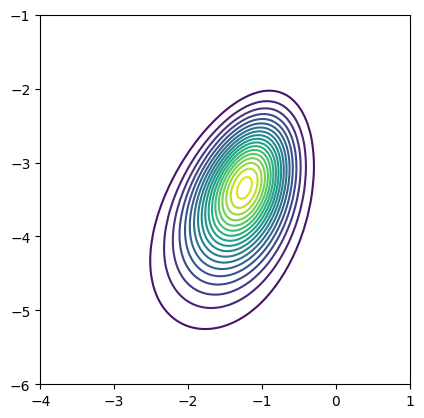

In [292]:

pos = np.dstack((X, Y))
pos = rearrange(pos, "h w d -> (h w) d")
Z = target.model.unormalized_logpdf(pos)
Z = np.exp(rearrange(Z, "(h w) -> h w", h = grid_size))

fig, ax = plt.subplots()
ax.contour(X, Y, Z/Z.sum(), levels=20, cmap="viridis",)
           
ax.set_aspect('equal')


  0%|          | 0/200 [00:00<?, ?it/s]/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:82: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
100%|██████████| 200/200 [00:34<00:00,  5.72it/s]


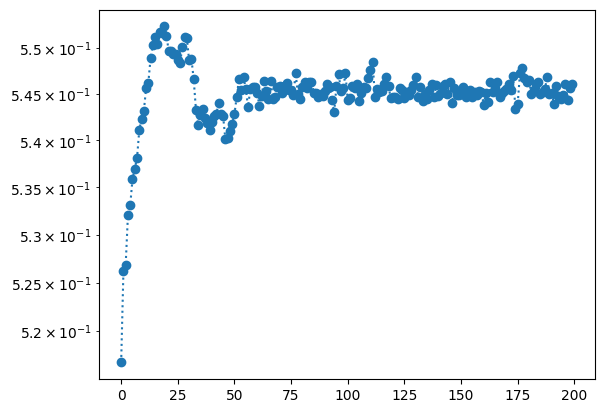

In [387]:
import tqdm 
number_of_good_y1 = []
new_x = np.random.multivariate_normal(target.model.mean1, target.model.cov, 10000)
new_x = target.model.scaler.transform(new_x)
B = 1000
noise = np.random.randn(B, d) 
component_indices = np.random.choice(vi.vgmm.n_components, size=B, p=vi.vgmm.weights)


for t  in tqdm.tqdm(range(0, vi.n_iterations, 100)):
        


    selected_means = vi.vgmm.optimized_means[t][component_indices]  # (B, d)
    selected_epsilons = vi.vgmm.optimized_epsilons[t][component_indices]  # (B, d, d)
    samples = selected_means +  (np.sqrt(selected_epsilons[:,None]) * noise)

    theta  = samples
    y = (target.model.sigmoid(np.dot(new_x,theta.T)).mean(axis = -1) > .5)*1
    number_of_good_y1.append(y.mean())
# plt.hist(y)
# print("Proba y =  1", target.model.sigmoid(np.dot(new_x,theta.T)).mean() )
plt.semilogy(number_of_good_y1, marker = "o", ls = "dotted")

  0%|          | 0/200 [00:00<?, ?it/s]/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:82: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
100%|██████████| 200/200 [00:35<00:00,  5.66it/s]


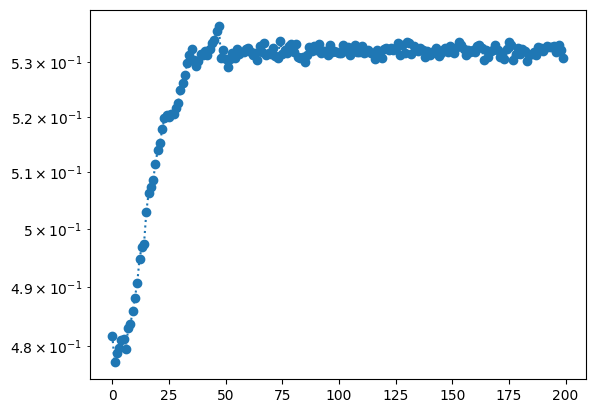

In [388]:
import tqdm 
number_of_good_y0 = []
new_x = np.random.multivariate_normal(target.model.mean0, target.model.cov, 10000)
new_x = target.model.scaler.transform(new_x)
B = 1000
noise = np.random.randn(B, d) 
component_indices = np.random.choice(vi.vgmm.n_components, size=B, p=vi.vgmm.weights)


for t  in tqdm.tqdm(range(0, vi.n_iterations, 100)):
        


    selected_means = vi.vgmm.optimized_means[t][component_indices]  # (B, d)
    selected_epsilons = vi.vgmm.optimized_epsilons[t][component_indices]  # (B, d, d)
    samples = selected_means +  (np.sqrt(selected_epsilons[:,None]) * noise)

    theta  = samples
    y = (target.model.sigmoid(np.dot(new_x,theta.T)).mean(axis = -1) <= .5)*1
    number_of_good_y0.append(y.mean())
# plt.hist(y)
# print("Proba y =  1", target.model.sigmoid(np.dot(new_x,theta.T)).mean() )
plt.semilogy(number_of_good_y0, marker = "o", ls = "dotted")

Text(0.5, 1.0, 'rate of correct prediction for class 0 and 1 over iterations, d = 100')

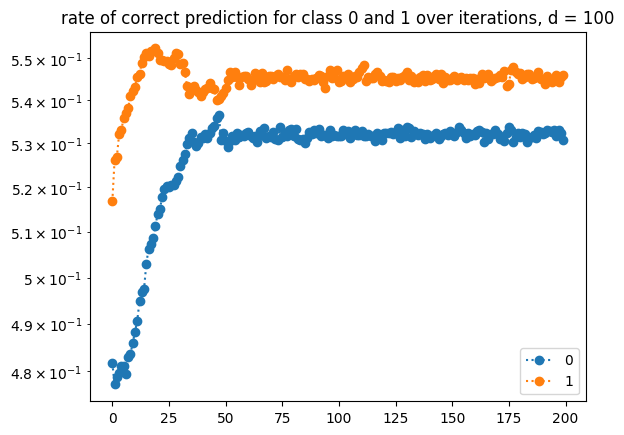

In [393]:
plt.semilogy(number_of_good_y0, marker = "o", ls = "dotted", label = "0")
plt.semilogy(number_of_good_y1, marker = "o", ls = "dotted", label = "1")
# plt.semilogy(np.array(vi.kls[1015::100])  , label = "kl")
plt.legend()
plt.title("rate of correct prediction for class 0 and 1 over iterations, d = 100")

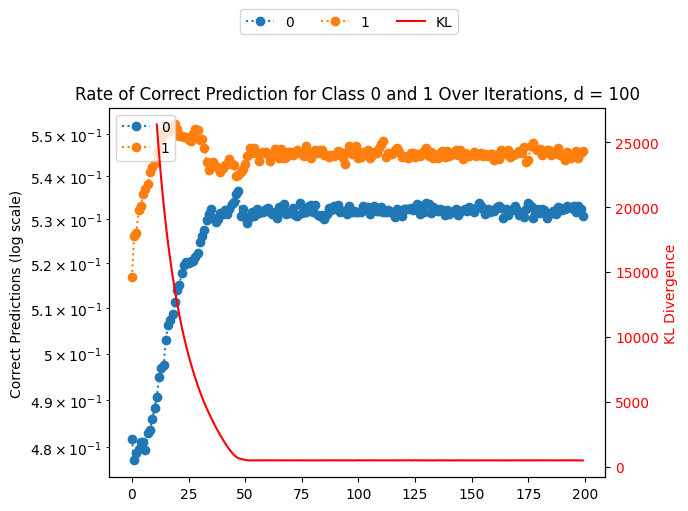

In [390]:
fig, ax1 = plt.subplots()

# Plot class 0 and 1 on the first y-axis
ax1.semilogy(number_of_good_y0, marker="o", ls="dotted", label="0")
ax1.semilogy(number_of_good_y1, marker="o", ls="dotted", label="1")
ax1.set_ylabel("Correct Predictions (log scale)")
ax1.legend(loc="upper left")

# Create a twin y-axis for KL
ax2 = ax1.twinx()
ax2.plot(np.array(vi.kls[::100]), color="red", label="KL")
ax2.set_ylabel("KL Divergence", color="red")
ax2.tick_params(axis='y', labelcolor='red')

# Title and show
plt.title("Rate of Correct Prediction for Class 0 and 1 Over Iterations, d = 100")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.show()


# Real Data


In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from matplotlib import pyplot as plt 


from src_bis.optim import VI_IGMM
from src_bis.target import Target
 

data = load_breast_cancer()
train_ratio = 0.6

X = data["data"]
y =  data["target"].reshape(-1,1)
N, d = X.shape
N_train = int(train_ratio * N)
X_train = X[:N_train]
y_train = y[:N_train, 0]

X_test = X[N_train:]
y_test = y[N_train:]




target = Target("logreg", dataset = (X_train, y_train))

vi = VI_IGMM(target, learning_rate = 0.01, n_iterations=5000, n_components = 5, scale = np.sqrt(d)*10 , BG = 100, s = np.sqrt(d) * 10, d = d)

vi.optimize(ibw = True, md  = False, means_only=False, plot_iter=1000, gen_noise=True,  scheduler=False, save_grads=False)

plt.semilogy(np.array(vi.kls) - np.array(vi.kls).min()+1)


30


  0%|          | 0/5000 [00:00<?, ?it/s]/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:83: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:88: RuntimeWarning: overflow encountered in exp
  logpdf = (self.y[:,None] * logits - np.log(1 + np.exp(logits))).sum(axis =  0)
  0%|          | 2/5000 [00:00<11:20,  7.34it/s]

LR 0.01
KL  inf


  9%|▊         | 432/5000 [00:35<05:31, 13.79it/s]

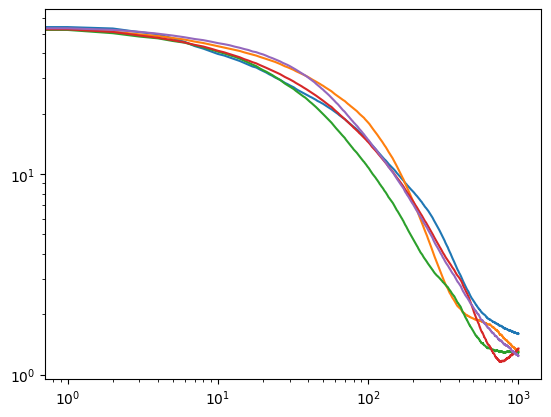

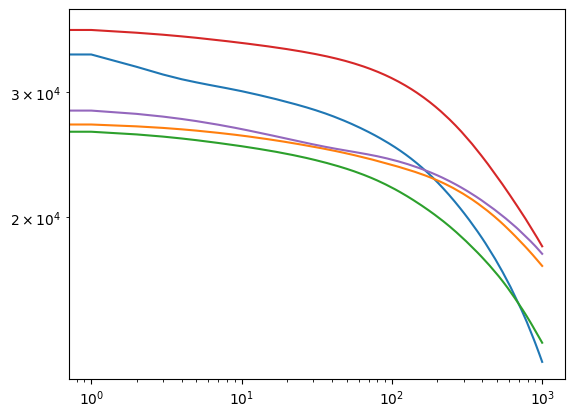

In [5]:
plt.loglog(vi.vgmm.optimized_epsilons)
plt.show()
plt.loglog((vi.vgmm.get_means_evolution()**2).sum(axis = -1))


In [17]:
((target.model.sigmoid(np.dot(new_x,theta.T)).mean(axis = -1) > 0.5) *1 == y_test[:,0]).mean()

/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:83: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.4956140350877193

In [25]:
y_pred[y_test[:,0] == 1] == y_test[:,0][y_test[:,0] == 1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

  0%|          | 0/10 [00:00<?, ?it/s]/Users/margueritetalamon/Desktop/crest/code/git/src_bis/logreg.py:83: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
100%|██████████| 10/10 [00:00<00:00, 223.89it/s]


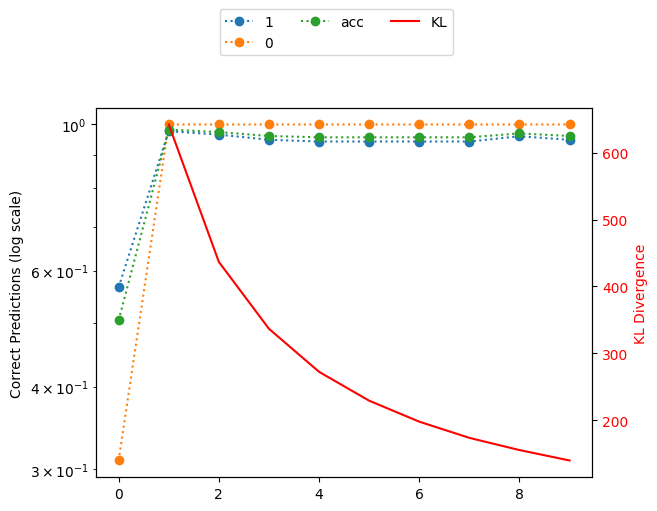

In [32]:
import tqdm 
number_of_good_y1 = []
number_of_good_y0 = []
accuracy = []
new_x = target.model.scaler.transform(X_test)
B = 1000
noise = np.random.randn(B, d) 
component_indices = np.random.choice(vi.vgmm.n_components, size=B, p=vi.vgmm.weights)


for t  in tqdm.tqdm(range(0, vi.n_iterations, 100)):
        


    selected_means = vi.vgmm.optimized_means[t][component_indices]  # (B, d)
    selected_epsilons = vi.vgmm.optimized_epsilons[t][component_indices]  # (B, d, d)
    samples = selected_means +  (np.sqrt(selected_epsilons[:,None]) * noise)

    theta  = samples
    y_pred = (target.model.sigmoid(np.dot(new_x,theta.T)).mean(axis = -1) > 0.5) *1
    accuracy  .append((y_pred == y_test[:,0]).mean())


    number_of_good_y1.append((y_pred[y_test[:,0] == 1] == y_test[:,0][y_test[:,0] == 1]).mean())
    number_of_good_y0.append((y_pred[y_test[:,0] == 0] == y_test[:,0][y_test[:,0] == 0]).mean())
# plt.hist(y)
# print("Proba y =  1", target.model.sigmoid(np.dot(new_x,theta.T)).mean() )
fig, ax1 = plt.subplots()

ax1.semilogy(number_of_good_y1, marker = "o", ls = "dotted", label = "1")
ax1.semilogy(number_of_good_y0, marker = "o", ls = "dotted", label = "0")
ax1.semilogy(accuracy, marker = "o", ls = "dotted", label = "acc")

ax1.set_ylabel("Correct Predictions (log scale)")
# ax1.legend(loc="upper left")

# Create a twin y-axis for KL
ax2 = ax1.twinx()
ax2.plot(np.array(vi.kls[::100]), color="red", label="KL")
ax2.set_ylabel("KL Divergence", color="red")
ax2.tick_params(axis='y', labelcolor='red')

# Title and show
# plt.title("Rate of Correct Prediction for Class 0 and 1 Over Iterations, d = 100")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)


